![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)

¡Ahora es **vuestro turno!**

En este proyecto final os he adjuntado un Dataset con 27.075 juegos en **Steam**, la popular plataforma de juegos de PC. Esta lista está actualizada desde el inicio hasta Abril de 2019.

Ya que tenéis los conocimientos, os pediré que me contestéis a **10 preguntas**:
1. Cual es el TOP10 de juegos más jugados?
2. Cuál es el género de videojuegos más vendido?
3. Qué géneros tienen mejores reviews de media?
4. Cuánto ha ganado el desarrollador que más juegos ha vendido?
5. Cómo afecta a las reviews que un juego sea Early Access?
6. Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?
7. En qué mes, desde que tenemos datos, se han publicado más juegos?
8. Cuántas horas se juega de media a cada tipo de juego mensualmente?
9. Los juegos Free to Play tienen mejores o peores reviews?
10. Cómo ha evolucionado el número de achievements (trofeos) por juego?

Os dejamos via libre para contestar a estas preguntas como más os apetezca. Recordad que no hay nada de malo en consultar por internet si tenéis dudas. Las documentaciones oficiales o [Stack Overflow](https://stackoverflow.com/) son sitios geniales para ello!

Al acabar este proyecto, publicadlo en el foro donde está colgado para ver quién es el mejor!

Os dejo la guía de pasos a seguir.

Muchos ánimos!!




# Importando librerías

In [50]:
import os
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Consiguiendo los datos

### Descomprimir el archivo

In [2]:
steam_zip = ZipFile('./SteamDataset.zip')
steam_zip.filelist #Visualisate how much files are (1)

[<ZipInfo filename='steam.csv' compress_type=deflate external_attr=0x20 file_size=3425223 compress_size=979195>]

In [3]:
file = steam_zip.open('steam.csv') #Extract file

### Construir DataFrame

In [4]:
df = pd.read_csv(file)

In [5]:
df.head()

,Unnamed: 0,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


In [6]:
df.columns

Index(['Unnamed: 0', 'name', 'release_date', 'developer', 'achievements',
       'positive_ratings', 'negative_ratings', 'avg_hours_per_user', 'price',
       'sells', 'action', 'adventure', 'rpg', 'simulation', 'strategy',
       'racing', 'free_to_play', 'early_access'],
      dtype='object')

In [7]:
df.set_index('Unnamed: 0', inplace=True)

In [8]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
Unnamed: 0,,,,,,,,,,,,,,,,,
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


# Limpieza y manipulación de datos

## Quitar datos duplicados o irrelevantes

In [9]:
df.duplicated().any()

True

In [10]:
len(df[df.duplicated()])

28

In [11]:
# Eliminar duplicados considerando toda la fila
df.drop_duplicates(inplace=True)

## Arreglar errores estructurales

In [12]:
# Eliminar el símbolo '€' de todos los valores en la columna 'price'
df['price'] = df['price'].str.replace('€', '', regex=False)

In [13]:
df.head(1)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
Unnamed: 0,,,,,,,,,,,,,,,,,
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False


In [14]:
# Convertir la columna 'price' a tipo float
df['price'] = df['price'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27075 non-null  object 
 1   release_date        27075 non-null  object 
 2   developer           27074 non-null  object 
 3   achievements        27075 non-null  int64  
 4   positive_ratings    27075 non-null  int64  
 5   negative_ratings    27075 non-null  int64  
 6   avg_hours_per_user  27075 non-null  int64  
 7   price               27075 non-null  float64
 8   sells               27075 non-null  float64
 9   action              27075 non-null  bool   
 10  adventure           27075 non-null  bool   
 11  rpg                 27075 non-null  bool   
 12  simulation          27075 non-null  bool   
 13  strategy            27075 non-null  bool   
 14  racing              27075 non-null  bool   
 15  free_to_play        27075 non-null  bool   
 16  early_acc

In [16]:
# Convertir la columna 'release_date' a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Crear una columna nueva solo para visualización en formato 'día-mes-año'
df['release_date_formatted'] = df['release_date'].dt.strftime('%d-%m-%Y')


In [19]:
df.head(1)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False,01-11-2000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    27075 non-null  object        
 1   release_date            27075 non-null  datetime64[ns]
 2   developer               27074 non-null  object        
 3   achievements            27075 non-null  int64         
 4   positive_ratings        27075 non-null  int64         
 5   negative_ratings        27075 non-null  int64         
 6   avg_hours_per_user      27075 non-null  int64         
 7   price                   27075 non-null  float64       
 8   sells                   27075 non-null  float64       
 9   action                  27075 non-null  bool          
 10  adventure               27075 non-null  bool          
 11  rpg                     27075 non-null  bool          
 12  simulation              27075 non-null  bool       

## Filtrar outliers 

In [21]:
df.describe() #Datos importantes, número, media, desviación, mínimo, quartiles, máximo

,release_date,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells
count,27075,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04
mean,2016-12-31 14:21:17.252077568,45.248864,1.000559e+03,211.027147,149.804949,6.078193,1.340905e+05
min,1997-06-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+04
25%,2016-04-04 00:00:00,0.000000,6.000000e+00,2.000000,0.000000,1.690000,1.000000e+04
50%,2017-08-08 00:00:00,7.000000,2.400000e+01,9.000000,0.000000,3.990000,1.000000e+04
75%,2018-06-06 12:00:00,23.000000,1.260000e+02,42.000000,0.000000,7.190000,3.500000e+04
max,2019-05-01 00:00:00,9821.000000,2.644404e+06,487076.000000,190625.000000,421.990000,1.500000e+08
std,NaN,352.670281,1.898872e+04,4284.938531,1827.038141,7.874922,1.328089e+06


In [25]:
#Steam se creo el 12sept2003, todo lo que esté publicado antes no es cierto.
df[df['release_date'] < '2003-09-12'] 

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False,01-11-2000
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000.0,True,False,False,False,False,False,False,False,01-04-1999
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000.0,True,False,False,False,False,False,False,False,01-05-2003
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000.0,True,False,False,False,False,False,False,False,01-06-2001
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000.0,True,False,False,False,False,False,False,False,01-11-1999
5,Ricochet,2000-11-01,Valve,0,2758,684,175,3.99,7500000.0,True,False,False,False,False,False,False,False,01-11-2000
6,Half-Life,1998-11-08,Valve,0,27755,1100,1300,7.19,7500000.0,True,False,False,False,False,False,False,False,08-11-1998
8,Half-Life: Blue Shift,2001-06-01,Gearbox Software,0,3822,420,361,3.99,7500000.0,True,False,False,False,False,False,False,False,01-06-2001
778,Mafia,2002-08-28,Illusion Softworks,0,1727,180,32,7.99,350000.0,True,True,False,False,False,False,False,False,28-08-2002


In [ ]:
#Han podido ser añadidos a posteriori, nada.

In [33]:
df.sort_values(by='avg_hours_per_user' , ascending=False).head(10) #Seguro que algo está mal aquí pero no encuentro info para
#contrastar así que lo dejo así

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
9201,The Abbey of Crime Extensum,2016-05-19,Manuel Pazos;Daniel Celemín,0,146,22,190625,0.00,75000.0,False,True,False,False,False,False,True,False,19-05-2016
1478,The Banner Saga: Factions,2013-02-25,Stoic,42,569,202,95245,0.00,350000.0,False,False,True,False,True,False,True,False,25-02-2013
6014,The Secret of Tremendous Corporation,2015-10-12,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,0,218,50,95242,0.00,150000.0,False,True,False,False,False,False,True,False,12-10-2015
8969,PRICE,2016-09-15,YETU GAME,8,4198,233,63481,0.00,350000.0,False,True,False,False,False,False,False,False,15-09-2016
3930,Boundless,2018-09-11,Wonderstruck,59,1153,486,55204,32.99,35000.0,True,True,True,False,False,False,False,False,11-09-2018
3969,Shroud of the Avatar: Forsaken Virtues,2018-03-27,Portalarium,29,1065,1017,54618,0.00,75000.0,False,False,True,False,False,False,True,False,27-03-2018
2435,X-Plane 11,2017-03-30,Laminar Research,0,2033,443,44169,54.99,150000.0,False,False,False,True,False,False,False,False,30-03-2017
23409,懒人修仙传,2018-11-14,托更的修罗,0,404,164,43632,2.89,35000.0,False,False,True,True,False,False,False,False,14-11-2018
2023,Fantasy Grounds,2014-05-09,"SmiteWorks USA, LLC",0,377,100,43074,29.99,35000.0,False,False,True,False,True,False,False,False,09-05-2014


## Lidiar con NANs

In [38]:
df.isna().any()

name                      False
release_date              False
developer                  True
achievements              False
positive_ratings          False
negative_ratings          False
avg_hours_per_user        False
price                     False
sells                     False
action                    False
adventure                 False
rpg                       False
simulation                False
strategy                  False
racing                    False
free_to_play              False
early_access              False
release_date_formatted    False
dtype: bool

In [40]:
df[df['developer'].isna()]

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
23071,The Battle Of Ages,2018-09-07,NaN,0,2,1,0,3.99,10000.0,True,False,True,False,False,False,False,True,07-09-2018


In [43]:
df['developer'] = df['developer'].fillna('uknown')

In [44]:
#Comprobamos
df.isna().any()

name                      False
release_date              False
developer                 False
achievements              False
positive_ratings          False
negative_ratings          False
avg_hours_per_user        False
price                     False
sells                     False
action                    False
adventure                 False
rpg                       False
simulation                False
strategy                  False
racing                    False
free_to_play              False
early_access              False
release_date_formatted    False
dtype: bool

## Validar nuestros datos

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    27075 non-null  object        
 1   release_date            27075 non-null  datetime64[ns]
 2   developer               27075 non-null  object        
 3   achievements            27075 non-null  int64         
 4   positive_ratings        27075 non-null  int64         
 5   negative_ratings        27075 non-null  int64         
 6   avg_hours_per_user      27075 non-null  int64         
 7   price                   27075 non-null  float64       
 8   sells                   27075 non-null  float64       
 9   action                  27075 non-null  bool          
 10  adventure               27075 non-null  bool          
 11  rpg                     27075 non-null  bool          
 12  simulation              27075 non-null  bool       

# EDA

## Cual es el TOP10 de juegos más jugados?

In [46]:
df.head(1)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False,01-11-2000


In [48]:
df.sort_values(by='sells',ascending=False).head(10)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,release_date_formatted
Unnamed: 0,,,,,,,,,,,,,,,,,,
22,Dota 2,2013-07-09,Valve,0,863507,142079,23944,0.00,150000000.0,True,False,False,False,True,False,True,False,09-07-2013
25,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,167,2644404,402313,22494,0.00,75000000.0,True,False,False,False,False,False,True,False,21-08-2012
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,PUBG Corporation,37,496184,487076,22938,26.99,75000000.0,True,True,False,False,False,False,False,False,21-12-2017
19,Team Fortress 2,2007-10-10,Valve,520,515879,34036,8495,0.00,35000000.0,True,False,False,False,False,False,True,False,10-10-2007
3362,Unturned,2017-07-07,Smartly Dressed Games,46,292574,31482,3248,0.00,35000000.0,True,True,False,False,False,False,True,False,07-07-2017
1634,Warframe,2013-03-25,Digital Extremes,187,226541,20268,5845,0.00,35000000.0,True,False,False,False,False,False,True,False,25-03-2013
1727,War Thunder,2013-08-15,Gaijin Entertainment,46,83852,22166,4200,0.00,15000000.0,True,False,False,True,False,False,True,False,15-08-2013
23,Portal 2,2011-04-18,Valve,51,138220,1891,1102,7.19,15000000.0,True,True,False,False,False,False,False,False,18-04-2011
1025,The Elder Scrolls V: Skyrim,2011-11-10,Bethesda Game Studios,75,237303,14951,7089,9.99,15000000.0,False,False,True,False,False,False,False,False,10-11-2011


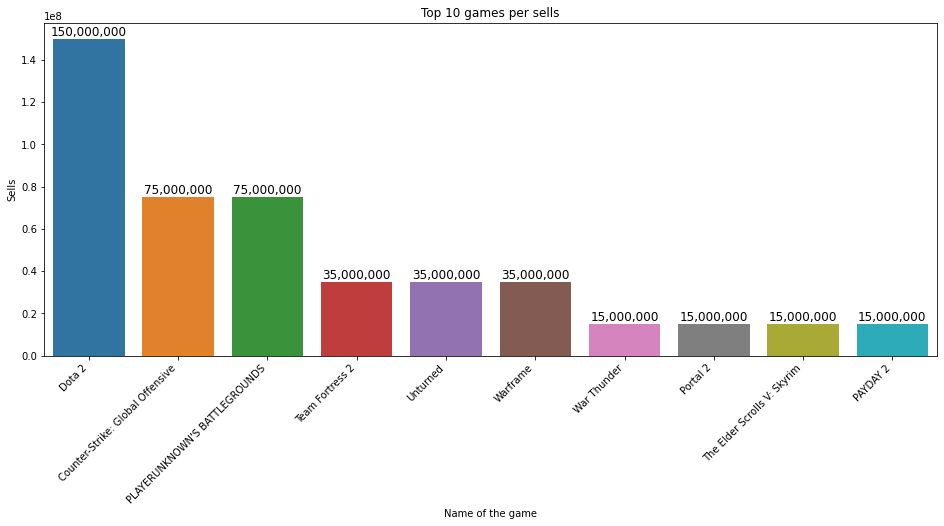

In [59]:
fig = plt.subplots(figsize=(16,6), dpi=72) 

bar_plot= sns.barplot(hue=df.sort_values(by='sells',ascending=False).head(10)['name'],
            y=df.sort_values(by='sells',ascending=False).head(10)['sells'],
            x=df.sort_values(by='sells',ascending=False).head(10)['name'])

plt.xticks(rotation=45, horizontalalignment='right')

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12, color='black')
    
    
plt.title('Top 10 games per sells')
plt.xlabel('Name of the game')
plt.ylabel('Sells')

plt.show()

## Cuál es el género de videojuegos más vendido?

## Qué géneros tienen mejores reviews de media?

## Cuánto ha ganado el desarrollador que más juegos ha vendido?

## Cómo afecta a las reviews que un juego sea Early Access?

## Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?

## En qué mes, desde que tenemos datos, se han publicado más juegos?

## Cuántas horas se juega de media a cada tipo de juego mensualmente?

## Los juegos Free to Play tienen mejores o peores reviews?

## Cómo ha evolucionado el número de achievements (trofeos) por juego?

## Bonus! Si tienes curiosidad, y quieres contestar más preguntas, puedes resolverlas aquí mismo!